## Calculating P-value

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
#Import libraries, set the seed, and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

In [2]:
#create a sample from our data
sample_df = df.sample(150)

### The scenario
$$H_0: \mu \leq 70$$

$$H_1: \mu > 70$$

In [3]:
#create our bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [4]:
#Bootstrap from the sample
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [5]:
#Get the standard deviation
np.std(means)

0.26582463905558962

In [6]:
#create a random sample for the null values
null_vals = np.random.normal(70, np.std(means),10000)

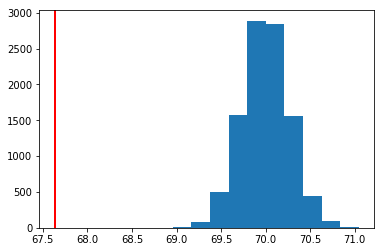

In [7]:
#Plot the null values
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r', linewidth=2); # sample mean

In [8]:
# Find the sample mean
sample_mean = sample_df.height.mean()
sample_mean

67.632976882280587

In [9]:
# Calculate the P-value
(null_vals > sample_mean).mean()

1.0

We choose the closest value to the alternative that is still in the null, which is 70. This is almost the largest value of the null. 

Because $H_1: \mu > 70$, we want to look at the shaded region to the right of our statistics.

However, `null_vals` are mostly larger than `sample_mean` =>  `(null_vals > sample_mean).mean()` is very large.

Our distribution is indeed on the left of the `null_vals` distribution, **so we fail to reject the null hypothesis.**

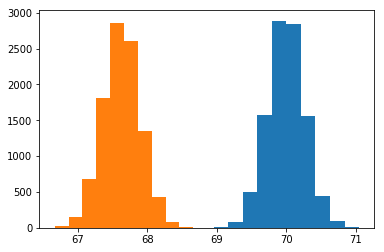

In [10]:
plt.hist(null_vals) # Distribution of 'null_vals' choosing 70 as the center
plt.hist(means);    # Distribution of our sample means

### New scenario

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [11]:
# Calculate p-value
(null_vals < sample_mean).mean()

0.0

We would now look at the shaded region to the left of our statistics.

However, `null_vals` are mostly smaller than `sample_mean` =>  `(null_vals < sample_mean).mean()` is very small.

Our distribution is indeed on the left of the `null_vals` distribution, so we **reject the null hypothesis in favor of alternative hypothesis**.

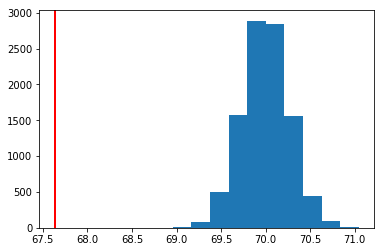

In [12]:
#Plot the null values
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r', linewidth=2); # sample mean

### New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [13]:
null_mean = 70

# Calculate p-value
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

We want to look at the values that are more extreme than our sample mean in either direction away from the null hypothesis.
* `(null_vals < sample_mean).mean()`: from the sample mean and on the left from the null 
* `(null_vals > null_mean + (null_mean - sample_mean))`: from the sample mean and on the right from the null

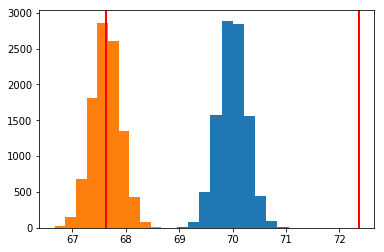

In [14]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals); # Distribution under the null
plt.hist(means)      # Distribution under our sample mean
plt.axvline(low,color='r', linewidth=2)
plt.axvline(high,color='r', linewidth=2);